In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [2]:
df = pd.read_csv("reviews.csv")
df

,ReviewText
0,This product is amazing and very useful!
1,I didn’t like the quality of the material.
2,Good value for money.
3,"Terrible experience, won’t buy again."
4,Absolutely loved it!
5,The product broke after one week.
6,Really happy with the performance.
7,Not worth the price.
8,Excellent build quality and fast delivery.
9,Disappointing experience overall.


In [3]:
if "ReviewText" in df.columns:
      print("yes")
else:
      print("no")      

yes


In [4]:
df.isnull().sum()

ReviewText    0
dtype: int64

In [5]:
df["TextLength"] = df["ReviewText"].apply(len)
df

,ReviewText,TextLength
0,This product is amazing and very useful!,40
1,I didn’t like the quality of the material.,42
2,Good value for money.,21
3,"Terrible experience, won’t buy again.",37
4,Absolutely loved it!,20
5,The product broke after one week.,33
6,Really happy with the performance.,34
7,Not worth the price.,20
8,Excellent build quality and fast delivery.,42
9,Disappointing experience overall.,33


In [6]:
def word_count(text):
      words = text.split()
      return len(words)
df["wordcount"] = df["ReviewText"].apply(word_count)
df

,ReviewText,TextLength,wordcount
0,This product is amazing and very useful!,40,7
1,I didn’t like the quality of the material.,42,8
2,Good value for money.,21,4
3,"Terrible experience, won’t buy again.",37,5
4,Absolutely loved it!,20,3
5,The product broke after one week.,33,6
6,Really happy with the performance.,34,5
7,Not worth the price.,20,4
8,Excellent build quality and fast delivery.,42,6
9,Disappointing experience overall.,33,3


In [7]:
alltext ="".join(df["ReviewText"])
print(alltext)
word = alltext.lower().replace(".","").replace(",","").replace("!","").split()
print(word)
word_s = pd.Series(word)
f_word = word_s.value_counts()
print(f_word)
t10 = f_word.head(10).reset_index()
t10.columns = ["word","freq"]
print(t10)


This product is amazing and very useful!I didn’t like the quality of the material.Good value for money.Terrible experience, won’t buy again.Absolutely loved it!The product broke after one week.Really happy with the performance.Not worth the price.Excellent build quality and fast delivery.Disappointing experience overall.
['this', 'product', 'is', 'amazing', 'and', 'very', 'usefuli', 'didn’t', 'like', 'the', 'quality', 'of', 'the', 'materialgood', 'value', 'for', 'moneyterrible', 'experience', 'won’t', 'buy', 'againabsolutely', 'loved', 'itthe', 'product', 'broke', 'after', 'one', 'weekreally', 'happy', 'with', 'the', 'performancenot', 'worth', 'the', 'priceexcellent', 'build', 'quality', 'and', 'fast', 'deliverydisappointing', 'experience', 'overall']
the                      4
and                      2
product                  2
quality                  2
experience               2
is                       1
this                     1
usefuli                  1
very                  

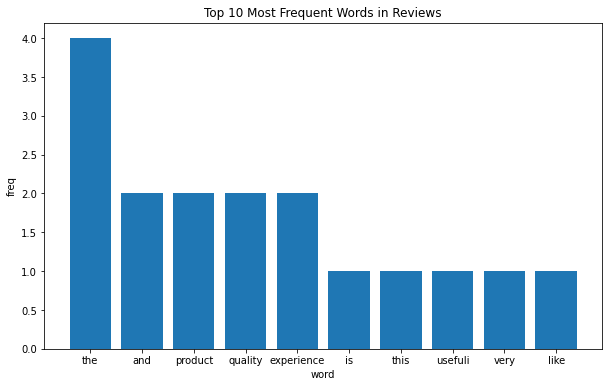

In [8]:
plt.figure(figsize=(10,6))
plt.bar(t10["word"],t10["freq"])
plt.title("Top 10 Most Frequent Words in Reviews")
plt.xlabel("word")
plt.ylabel("freq")
plt.show()